# Dvornik et al. 2023 example

This tutorial will briefly show the minimal setup that allows one to get the power spectra 
and the stellar mass function as defined in Dvornik et al. 2023 (the KiDS 2x2pt+SMF paper).
We will use the best fit parameters as reported in the paper, 
together with the fixed parameters that are necessary.

First, we need to import the relevant libraries:

In [1]:
from onepower import Spectra     # The main onepower class
import matplotlib.pyplot as plt  # The necessary plotting library
import numpy as np               # Numerical array library

# This just serves to render plots inline in the notebook. Do not use in a script.
%matplotlib inline        

Next step is already for us to define the required parameters. While the `onepower` comes with all required parameters having a default values, here we will list all of them and set them to values as used in Dvornik et al. 2023.
As all the classes in `onepower` take keyword arguments (there are no positional arguments to be passed) we can simply construct a big dictionary.

First we will set up the HOD parameters, coming from the best fit values of Dvornik et al. 2023:

In [2]:
hod_params = {
    'log10_obs_norm_c': 10.521,
    'log10_m_ch': 11.145,
    'g1': 7.385,
    'g2': 0.201,
    'sigma_log10_O_c': 0.159,
    'norm_s': 0.562,
    'pivot': 13.0,
    'alpha_s': -0.847,
    'beta_s': 2,
    'b0': -0.120,
    'b1': 1.177,
    'b2': 0.0,      # Set to 0, not used in fit
    'A_cen': None,  # No assembly bias assumed
    'A_sat': None,  # No assembly bias assumed
}

Next we can setup the dictionary with HOD settings, setting up our redshift and stellar mass bins:

In [3]:
hod_settings = {
    'observables_file': None,
    'obs_min': np.array([9.1, 9.6, 9.95, 10.25, 10.5, 10.7]),
    'obs_max': np.array([9.6, 9.95, 10.25, 10.5, 10.7, 11.3]),
    'zmin': np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0]), 
    'zmax': np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5]), 
    'nz': 15,
    'nobs': 300, 
    'observable_h_unit': '1/h^2',
}

We do the similar also for the settigs for the observable function in our case the stellar mass function

In [4]:
obs_settings = {
    'observables_file': None,
    'obs_min': np.array([9.1]),
    'obs_max': np.array([11.3]),
    'zmin': np.array([0.25]),
    'zmax': np.array([0.25]), 
    'nz': 1,
    'nobs': 300, 
    'observable_h_unit': '1/h^2',
}

The last small dictionary we need to define is for the Poisson parametrisation of satellite galaxies:

In [5]:
poisson_params = {
    'poisson_type': 'scalar',
    'poisson': 0.417,
    'M_0': None,
    'slope': None
}

Now that we have these smaller dictionaries that set specific settings for HOD, observable function and poisson parameter we can define all other parameters:

In [6]:
kwargs = {
        'k_vec': np.logspace(-4, 4, 100),
        'z_vec': np.array([0.12, 0.15, 0.18, 0.22, 0.27, 0.32]),
        'lnk_min': np.log(10**(-4.0)),
        'lnk_max': np.log(10**(4.0)),
        'dlnk': (np.log(10**(4.0)) - np.log(10**(-4.0))) / 100,
        'Mmin': 9.0,
        'Mmax': 16.0,
        'dlog10m': 0.05,
        'mdef_model': 'SOMean',
        'hmf_model': 'Tinker10',
        'bias_model': 'Tinker10',
        'halo_profile_model': 'NFW',
        'halo_concentration_model': 'Duffy08',
        'transfer_model': 'CAMB',
        'growth_model': 'CambGrowth',
        'norm_cen': 0.939,  # normalisation of c(M) relation for matter/centrals
        'norm_sat': 0.84,   # normalisation of c(M) relation for satellites
        'overdensity': 200,
        'delta_c': 1.686,
        'one_halo_ktrunc': 0.1,
        'two_halo_ktrunc': 2.0,
        'bnl': True,
     
        'omega_c': 0.25,
        'omega_m': 0.297,
        'omega_b': 0.01,
        'h0': 0.711,
        'n_s': 0.978,
        'sigma_8': 0.801,
    
        'poisson_par': poisson_params,
        'pointmass': True,
        
        'hod_model': 'Cacciato',
        'hod_params': hod_params,
        'hod_settings': hod_settings,
        'obs_settings': obs_settings,
        'compute_observable': True,
}

Now that all the parameters are set, we can initialise the `Spectra()` class and get the relevant power spectra and the stellar mass function

In [7]:
results = Spectra(**kwargs)

For the Dvornik et al. 2023 paper, we need to ask for galaxy-galaxy power spectrum, galaxy-matter power spectrum and stellar mass function

In [8]:
power_gg = results.power_spectrum_gg.pk_tot
power_gm = results.power_spectrum_gm.pk_tot

smf = results.obs_func

We can now plot the resulting power spectra and the stellar mass function

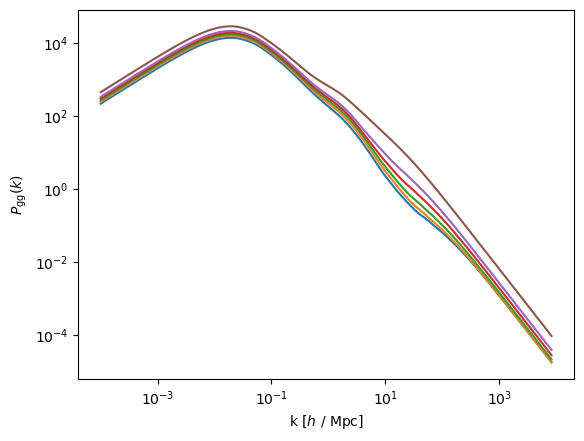

In [9]:
for i,power in enumerate(power_gg):
    plt.plot(results.k_vec, power[i, :])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k [$h$ / Mpc]')
plt.ylabel(r'$P_{\rm gg}(k)$')
plt.show()

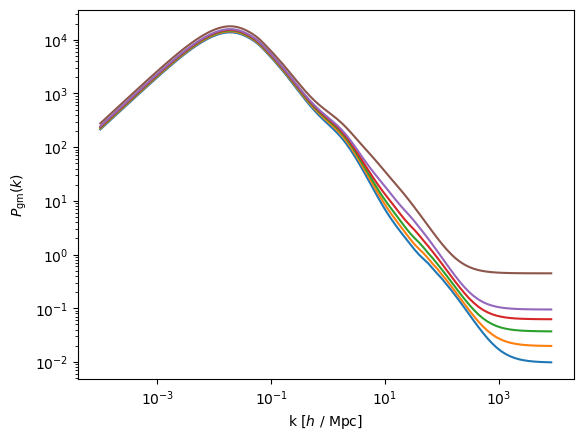

In [10]:
for i,power in enumerate(power_gm):
    plt.plot(results.k_vec, power[i, :])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k [$h$ / Mpc]')
plt.ylabel(r'$P_{\rm gm}(k)$')
plt.show()

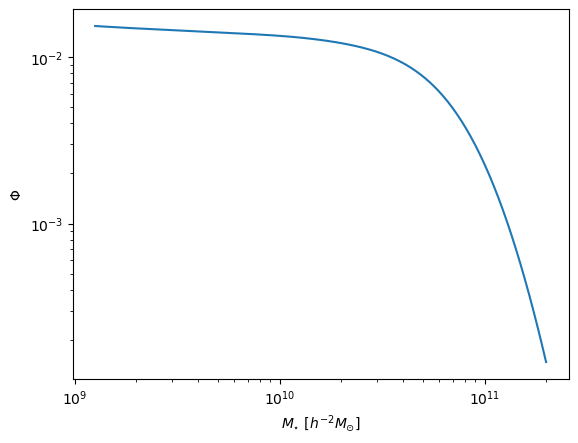

In [11]:

plt.plot(results.obs_func_obs[0, 0, :], smf[0, 0, :])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$M_{\star}\ [h^{-2}M_{\odot}]$')
plt.ylabel(r'$\Phi$')
plt.show()